In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
df=pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.shape

(2290, 6)

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
correlation = df.corr()

C:\Users\Aniket Singh\AppData\Local\Temp\ipykernel_2184\3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

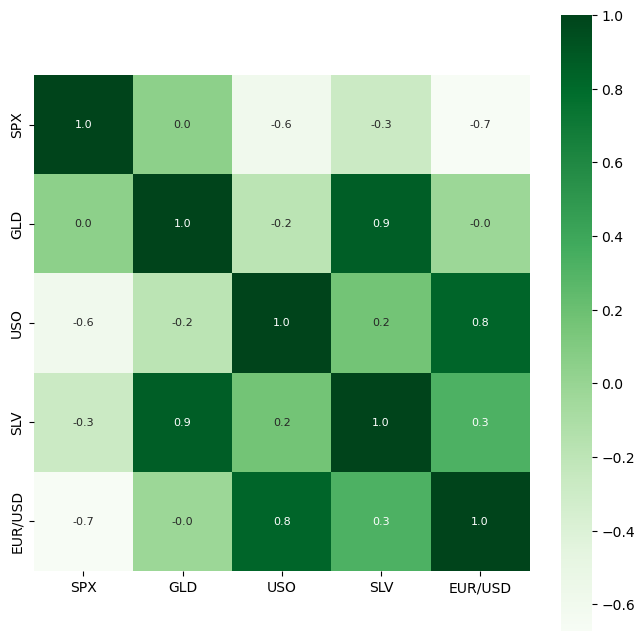

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [20]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\Aniket Singh\AppData\Local\Temp\ipykernel_2184\2288806395.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

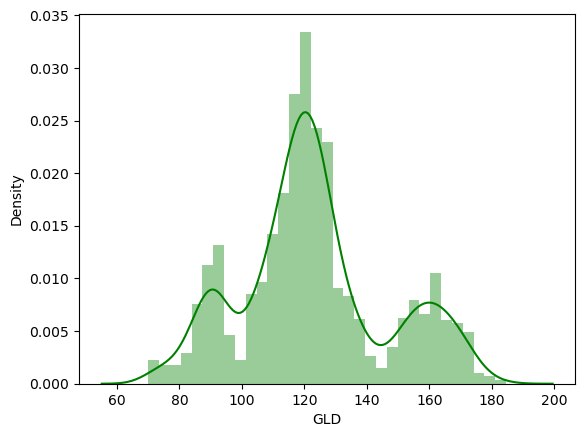

In [23]:
sns.distplot(df['GLD'], color='green')


In [27]:
X = df.drop(['Date','GLD'], axis=1)
Y = df['GLD']


In [29]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [30]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [32]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
test_data_prediction = regressor.predict(X_test)


In [38]:
print(test_data_prediction)


[168.48139912  82.01799994 115.94740018 127.64230065 120.69420128
 154.56249758 150.35739878 126.16150064 117.50539879 125.96340089
 116.74330092 172.15130064 141.83899859 167.54589883 115.20749997
 117.8487001  138.05710358 169.60019983 158.85200221 159.14409903
 155.11369986 124.96960026 176.6141993  157.09780308 125.23100057
  93.74349968  76.62229998 120.54059991 119.06649953 167.52149973
  88.08530067 125.31270007  91.40440089 117.72680062 121.09979916
 135.78750082 115.60430098 115.27040068 147.30019949 107.20900109
 104.42280229  87.27579808 126.76760019 118.08439961 153.35299916
 119.5367004  108.33309972 108.22819861  93.32940064 127.42569669
  74.34560062 113.6187995  121.6529003  111.15609957 119.01349918
 120.78739917 159.47460047 167.09700119 147.14549665  85.82289869
  94.31570049  86.84639923  90.46290029 118.89810079 126.40410073
 127.57239998 169.21250021 122.29049967 117.38379914  98.72030051
 168.31500127 143.52989784 131.88450212 121.16050232 121.10219947
 119.82160

In [40]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9891161988420405


In [41]:
Y_test = list(Y_test)

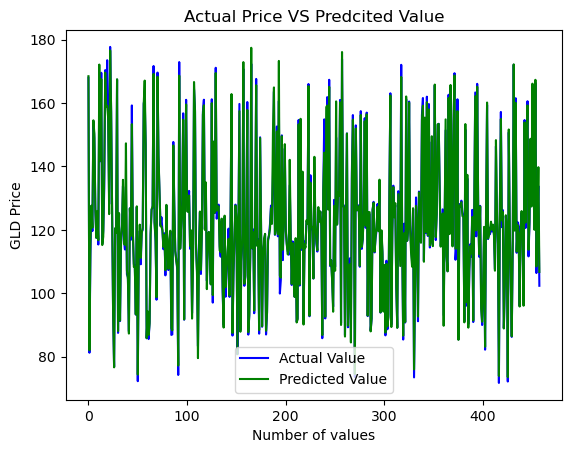

In [44]:
plt.plot(Y_test, color='blue', label = "Actual Value")
plt.plot(test_data_prediction, color="green", label = "Predicted Value")
plt.title('Actual Price VS Predcited Value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()